<center> <h1>Edge Detection and Corner Detection </h1> </center>

## Edge Detection with Canny

- Edge detection, görüntüyü farklı nesnelere karşılık gelen alanlara bölmek istediğimizde yaygın olarak kullanılır.
- Bir görüntüyü kenarlarından temsil etmenin avantajı, veri miktarının şekiller gibi görüntü bilgisinin çoğunu koruyarak önemli ölçüde azaltılmasıdır.
- Filters kısmında sobel ile edge detection yapmıştık. Şimdi daha yaygın olarak görüntü işlemede standart olan Canny edge detection yöntemini inceleyeceğiz.
- Canny, Sobel algoritmasına kıyasla daha yüksek doğrulukta kenarları tespit eder ve daha az sürede çalışır.

(<matplotlib.image.AxesImage at 0x7f2a72a9d930>,
 (-0.5, 383.5, 302.5, -0.5),
 Text(0.5, 1.0, 'Original 2D Image'))

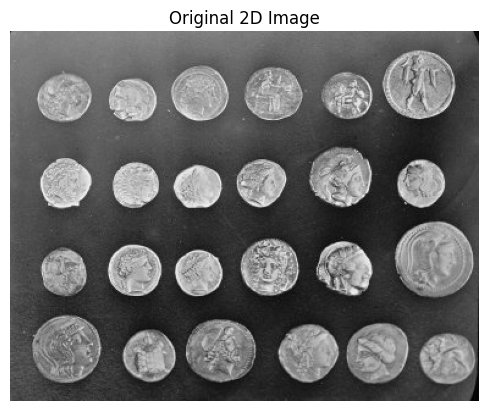

In [6]:
# Kenarları bulunucak resmi yükleyelim
from skimage import data
image = data.coins() # 2D görüntü

import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray'), plt.axis('off'), plt.title('Original 2D Image')

(<matplotlib.image.AxesImage at 0x7f2a728f35b0>,
 (-0.5, 383.5, 302.5, -0.5),
 Text(0.5, 1.0, 'Canny Edges'))

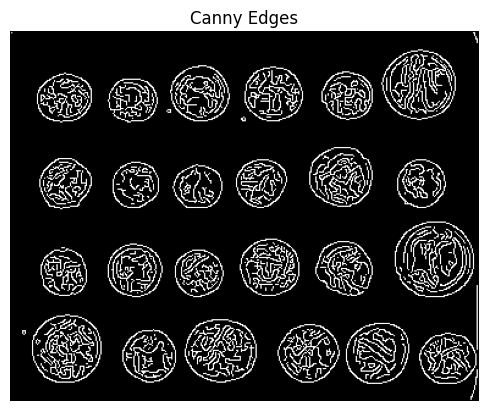

In [7]:
# Kenarları bulmak için Canny kenar algılayıcıyı kullanalım
from skimage.feature import canny 

# Canny kenar algılayıcıyı uygulayalım
canny_edges = canny(image)

plt.imshow(canny_edges, cmap='gray'), plt.axis('off'), plt.title('Canny Edges')

### Gauss with Canny
- Görüntüdeki gürültüyü gereksiz detayları gidermek için gaus filtresi uygulayalım
- sigma ne kadar düşükse gauss değeri o kadar azdır daha çok detay gösterir

(<matplotlib.image.AxesImage at 0x7f2a7285e320>,
 (-0.5, 383.5, 302.5, -0.5),
 Text(0.5, 1.0, 'Canny Edges, sigma=2'))

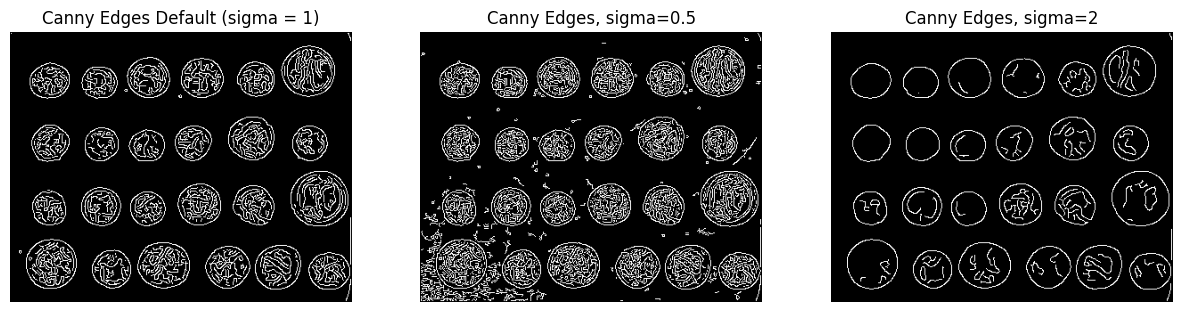

In [9]:
canny_edges_05 = canny(image, sigma=0.5) 
canny_edges_2 = canny(image, sigma=2)

f, (x1, x2, x3) = plt.subplots(1, 3, figsize=(15, 5))
x1.imshow(canny_edges, cmap='gray'), x1.axis('off'), x1.set_title('Canny Edges Default (sigma = 1)')
x2.imshow(canny_edges_05, cmap='gray'), x2.axis('off'), x2.set_title('Canny Edges, sigma=0.5')
x3.imshow(canny_edges_2, cmap='gray'), x3.axis('off'), x3.set_title('Canny Edges, sigma=2')

## Corner Detection 
- Köşe algılama, belirli türdeki özellikleri çıkarmak ve bir görüntünün içeriğini çıkarmak için kullanılan bir yaklaşımdır
- Görüntü kaydında hareket algılamada, panaroma birleştirmede, 3D modelleme ve nesne tanımada kullanılır
- Köşe, iki kenarın kesişimi olarak tanımlanabilir, sezgisel olarak konturların bir birleşimi de denilebilir
- Köşeleri point of interest olarak algılayarak nesnelerin farklı açılardan çekilmiş görüntülerini eşleştirebiliriz.

### Harris Corner Detection
- Bilgisarlı görü algoritmalarında yaygın olarak kullanılan bir köşe algılama operatörüdür.

(<matplotlib.image.AxesImage at 0x7f2a72648250>,
 (-0.5, 657.5, 500.5, -0.5),
 Text(0.5, 1.0, 'Original Image'))

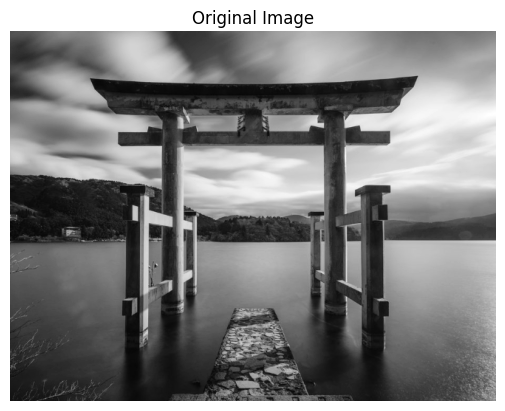

In [35]:
from skimage import color # 2D görüntüde çalışmak için

image = plt.imread('corner.png') # 3D görüntü
image = color.rgb2gray(image) # 3D görüntüyü 2D görüntüye dönüştür

plt.imshow(image, cmap='gray'), plt.axis('off'), plt.title('Original Image')

In [54]:
# corner_harris fonksiyonunu kullanarak köşeleri bulalım
from skimage.feature import corner_harris, corner_peaks

# min_distance: iki köşe arasındaki minimum mesafe
# threshold_rel: köşe olma eşiği arttıkça daha az köşe bulunur
coords = corner_peaks(corner_harris(image), min_distance=5, threshold_rel=0.08) 
print(f'Tespit Edilen Köşe Sayısı: {len(coords)}')

Tespit Edilen Köşe Sayısı: 117


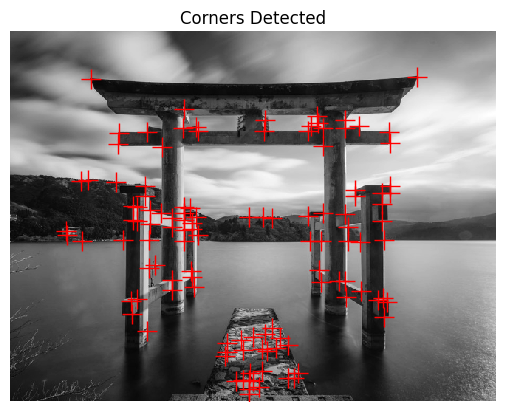

In [55]:
def show_image_with_corners(image, coords, title="Corners Detected"):
    plt.imshow(image,interpolation= "nearest", cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')
    plt.show()

show_image_with_corners(image, coords)